This code performs feature importance analysis using a RandomForest classification model. The output of the code will be a list of the selected features with their corresponding importance values. This can be useful to understand which variables have the greatest impact on anomaly prediction.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

data = pd.read_csv('ECOD_scores.csv')

#Trasforma feature non numeriche in numeriche con LabelEncoder
encoder = LabelEncoder()
data['country_encoded'] = encoder.fit_transform(data['country'])
data['iban_encoded'] = encoder.fit_transform(data['IBAN_bankCode'])
data['businessName_encoded'] = encoder.fit_transform(data['businessName'])
data['userAgent_browserFamily_encoded'] = encoder.fit_transform(data['userAgent_browserFamily'])
data['userAgent_osFamily_encoded'] = encoder.fit_transform(data['userAgent_osFamily'])
data['SIA_encoded'] = encoder.fit_transform(data['SIA'])
data['companyType_encoded'] = encoder.fit_transform(data['companyType'])

#Converte la colonna 'timestamp' in tipo datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

#Converte la colonna "timestamp" da un formato di data e ora a un timestamp Unix espresso in millisecondi
data['timestamp'] = data['timestamp'].astype(int) // 10**9

features = ['customerId', 'timestamp', 'amount', 'userAgent_isPc', 'CAP', 'SAE', 'RAE', 'country_encoded', 'businessName_encoded', 'userAgent_browserFamily_encoded', 'userAgent_osFamily_encoded', 'SIA_encoded', 'companyType_encoded']


#Addestramento modello RandomForest
X = data[features]
y = data['is_anomaly']
rf = RandomForestClassifier()
rf.fit(X, y)

feature_importances = rf.feature_importances_

print("Feature Importances:")
for feature, importance in zip(features, feature_importances):
    print(f"{feature}: {importance:.2f}")



Feature Importances:
customerId: 0.03
timestamp: 0.06
amount: 0.10
userAgent_isPc: 0.07
CAP: 0.05
SAE: 0.07
RAE: 0.05
country_encoded: 0.04
iban_encoded: 0.31
businessName_encoded: 0.05
userAgent_browserFamily_encoded: 0.03
userAgent_osFamily_encoded: 0.06
SIA_encoded: 0.05
companyType_encoded: 0.04


This code identifies anomalies in the data based on the z-score of the "amount" column and saves these anomalies in an Excel file. The z-score is calculated for each value in the "amount" column. The z-score is a statistical measure that indicates how much a given value deviates from the mean in terms of standard deviations. It is used to assess how atypical or out-of-the-norm a particular value is within a dataset. A threshold is set to identify anomalies. Rows with a z-score exceeding this threshold will be considered likely anomalies. The z-score is printed along with the respective "is_anomaly" column to verify how many anomalies correspond to a z-score above the threshold.

In [ ]:
import pandas as pd

#Montaggio Google Drive
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('ECOD_scores.csv')

#Media, varianza e deviazione standard di "amount"
media_importo = df['amount'].mean()
varianza_importo = df['amount'].var()
deviazione_standard_importo = df['amount'].std()

#Approssima a due cifre dopo la virgola
media_importo = round(media_importo, 2)
varianza_importo = round(varianza_importo, 2)

print(f"Amount's mean: {media_importo}")
print(f"Amount's variance: {varianza_importo}")

#Calcola lo z-score per ogni valore di "amount"
df['z_score'] = (df['amount'] - media_importo) / deviazione_standard_importo

#Soglia al di sopra della quale viene stampato lo z-score
soglia = 5

#Righe con uno z-score maggiore della soglia
anomalie = df[df['z_score'].abs() > soglia]

print(anomalie[['z_score', 'is_anomaly']])

anomalie_selezionate = anomalie[['z_score', 'is_anomaly']]

#Salva le colonne selezionate su Google Drive in un file Excel
anomalie_selezionate.to_excel('/content/drive/MyDrive/anomalie_ECOD.xlsx', index=False)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Media dell'importo: 4094.35
Varianza dell'importo: 495432714.87
         z_score  is_anomaly
761    22.279565           1
808    15.050501           1
966     6.344879           0
968    20.033214           0
1029   17.786863           0
...          ...         ...
87133   6.567590           0
87155   8.801458           0
87827  23.582449           0
88464  23.582449           0
90905  11.946350           0

[328 rows x 2 columns]


This code creates two histograms to visualize the distribution of values in the "amount" column:

1.   The first histogram provides a visual representation of the distribution of transaction amount data.
2.   The second histogram helps visualize how the amounts of transactions identified as anomalies are distributed.


Displaying both histograms can be useful to compare the distribution of normal transaction amounts with that of anomalous transactions.

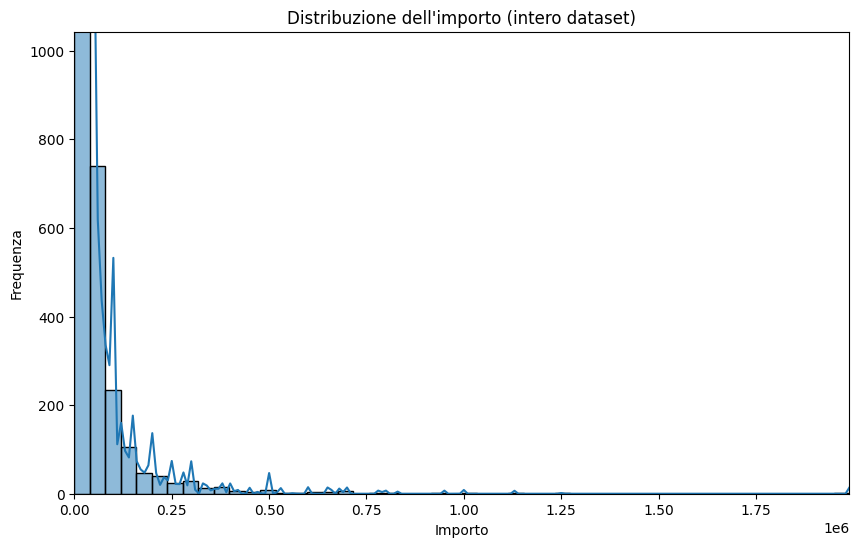

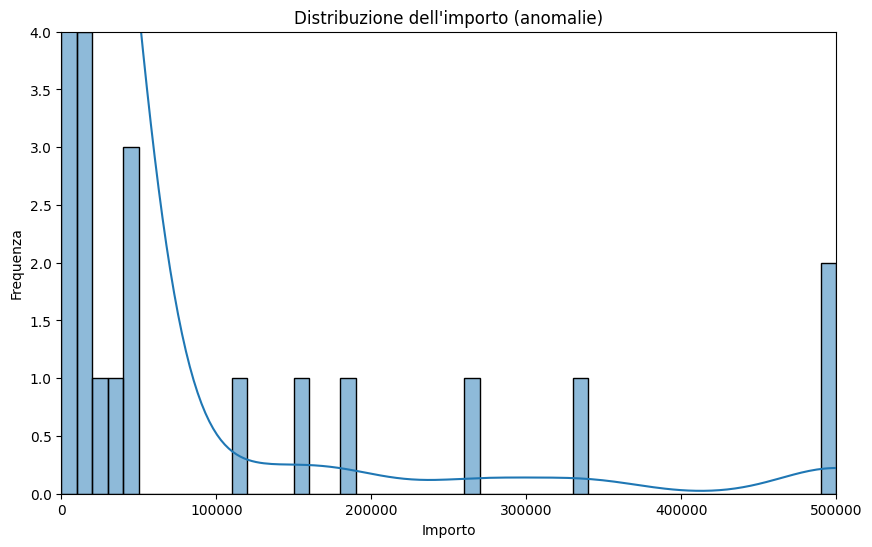

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import ScalarFormatter

df = pd.read_csv('ECOD_scores.csv')

anomalie = df[df['is_anomaly'] == 1]

#Istogramma per l'intero dataset
plt.figure(figsize=(10, 6))
hist = sns.histplot(df['amount'], bins=50, kde=True)

# Imposta l'intervallo dell'asse X in base ai dati reali
plt.xlim(0, df['amount'].max())

# Imposta l'intervallo dell'asse Y in base ai dati reali
plt.ylim(0, df['amount'].value_counts().max())


plt.title('Distribuzione dell\'importo (intero dataset)')
plt.xlabel('Importo')
plt.ylabel('Frequenza')
plt.show()

#Istogramma per le anomalie
plt.figure(figsize=(10, 6))
sns.histplot(anomalie['amount'], bins=50, kde=True)

# Imposta l'intervallo dell'asse X in base ai dati reali
plt.xlim(0, anomalie['amount'].max())

# Imposta l'intervallo dell'asse Y in base ai dati reali
plt.ylim(0, anomalie['amount'].value_counts().max())


plt.title('Distribuzione dell\'importo (anomalie)')
plt.xlabel('Importo')
plt.ylabel('Frequenza')
plt.show()



This code performs a correlation analysis between the variables in the dataset and the "is_anomaly" column. These correlations can provide insights into how much a variable is related to the presence of anomalies in the data. Correlations range from -1 to 1, where -1 indicates a strong negative correlation, 1 indicates a strong positive correlation, and 0 indicates no correlation.

In [ ]:
import pandas as pd

data = pd.read_csv('ECOD_scores.csv')

#Calcola la correlazione tra tutte le variabili e "is_anomaly"
correlations = data.corrwith(data['is_anomaly'])

correlations = correlations.drop(['is_anomaly'])

correlations = correlations.drop(['Unnamed: 0'])

correlations = correlations.drop(['scores'])

print("Correlazioni con 'is_anomaly':")
print(correlations)


Correlazioni con 'is_anomaly' (esclusa 'is_anomaly' vs. 'is_anomaly' e 'Unnamed: 0' vs. 'is_anomaly'):
customerId       -0.005557
amount            0.032418
userAgent_isPc   -0.221394
CAP               0.017301
SAE               0.056040
RAE              -0.041971
dtype: float64


<ipython-input-4-6136e49297c8>:7: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corrwith(data['is_anomaly'])


Horizontal bar chart representation of the previously found correlations.

<ipython-input-5-0b6cbae1d3fe>:8: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corrwith(data['is_anomaly'])


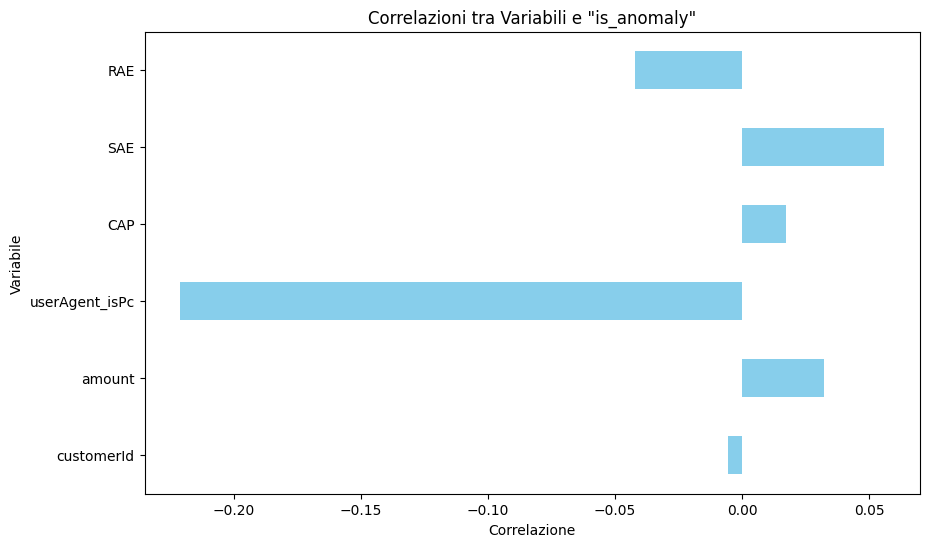

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('ECOD_scores.csv')

#Crea un grafico a barre orizzontali per le correlazioni

correlations = data.corrwith(data['is_anomaly'])

correlations = correlations.drop(['is_anomaly'])

correlations = correlations.drop(['Unnamed: 0'])

correlations = correlations.drop(['scores'])

plt.figure(figsize=(10, 6))
correlations.plot(kind='barh', color='skyblue')
plt.xlabel('Correlazione')
plt.ylabel('Variabile')
plt.title('Correlazioni tra Variabili e "is_anomaly"')
plt.show()


This code allows you to visualize how anomalies are distributed over time, enabling you to identify any trends or spikes in anomalies based on dates.

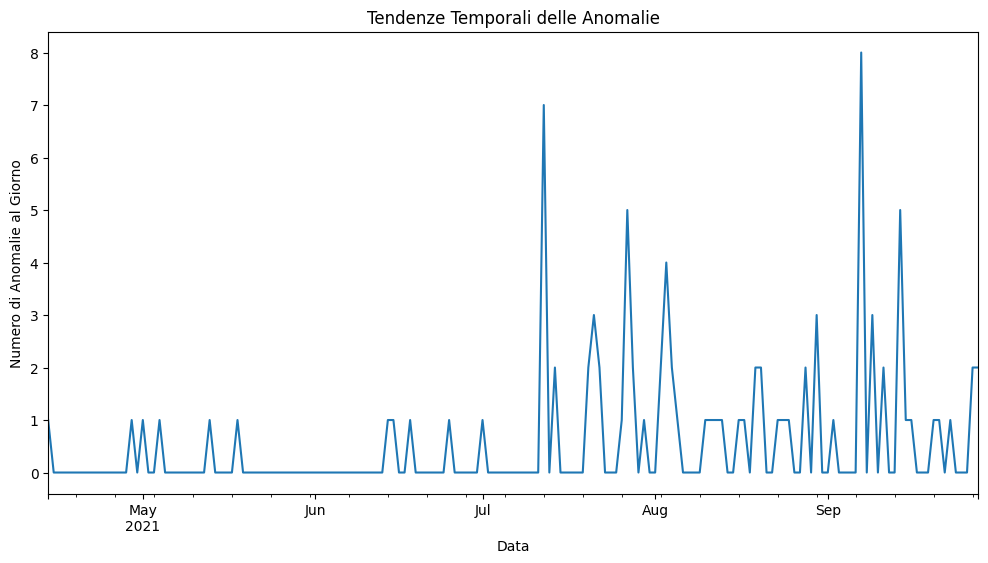

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('ECOD_scores.csv')


#Analisi delle tendenze temporali delle anomalie
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)
anomalies_over_time = data[data['is_anomaly'] == 1].resample('D').size()

#Visualizzazione delle tendenze temporali delle anomalie
plt.figure(figsize=(12, 6))
anomalies_over_time.plot()
plt.title('Tendenze Temporali delle Anomalie')
plt.xlabel('Data')
plt.ylabel('Numero di Anomalie al Giorno')
plt.show()
